In [43]:
import pandas as pd
import utils
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, RocCurveDisplay


In [44]:
##Cargar los datos
ruta_archivo = '../proyecto2/data/cars_dt1.csv'
df = utils.cargar_datos(ruta_archivo)
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [45]:
##Exploracion incial
utils.exploracion_inicial(df)

Informacion del dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB
None
Estadisticas del dataset
       buying  maint doors persons lug_boot safety  class
count    1728   1728  1728    1728     1728   1728   1728
unique      4      4     4       3        3      3      4
top     vhigh  vhigh     2       2    small    low  unacc
freq      432    432   432     576      576    576   1210
Medidas de tendencia central y dispersión para cada variable numérica
##No se encontraron columnas numéricas en el DataFrame.##


##### Se verifican la informacion del dataset en el cual se ven 7 columnas y 1728 filas sin elementos nulos. Tambien se ven las estadisticas basicas de todos los elementos categoricos en este caso.

In [46]:
na_df = utils.identificar_valores_faltantes(df)
print(na_df)
utils.verificacion_elementos_duplicados(df)

Valores faltantes en el dataset
          datos sin NAs en q  Na en q  Na en %
buying                  1728        0      0.0
maint                   1728        0      0.0
doors                   1728        0      0.0
persons                 1728        0      0.0
lug_boot                1728        0      0.0
safety                  1728        0      0.0
class                   1728        0      0.0
Cantidad de filas duplicadas:  0


##### No se encuentran valores nulos o duplicados

In [47]:
utils.contar_valores_categoricos(df)
df = utils.modificar_valores_categoricos(df)
print(df.head())

Valores únicos en la columna: buying
buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
--------------------------------------------------
Valores únicos en la columna: maint
maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
--------------------------------------------------
Valores únicos en la columna: doors
doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64
--------------------------------------------------
Valores únicos en la columna: persons
persons
2       576
4       576
more    576
Name: count, dtype: int64
--------------------------------------------------
Valores únicos en la columna: lug_boot
lug_boot
small    576
med      576
big      576
Name: count, dtype: int64
--------------------------------------------------
Valores únicos en la columna: safety
safety
low     576
med     576
high    576
Name: count, dtype: int64
--------------------------------------------------
Valor

##### No se encuentran valores categoricos con inconsistencias, por lo que se procede a pasar los valores a mayuscula y eliminar espacios en en blanco.

In [48]:
### Debido a que los datos de persons y doors son categoricos se procede a modificar los valores por numeros
## y cambiar el formato de estas columnas a numeros. 5more se convierte en 5 en doors y 6 para el caso de more en persons
df['doors'] = df['doors'].str.replace('5MORE', '5')
df['persons'] = df['persons'].str.replace('MORE', '6')
df['doors'] = df['doors'].astype('Int64')
df['persons'] = df['persons'].astype('Int64')
df.dtypes

buying      object
maint       object
doors        Int64
persons      Int64
lug_boot    object
safety      object
class       object
dtype: object

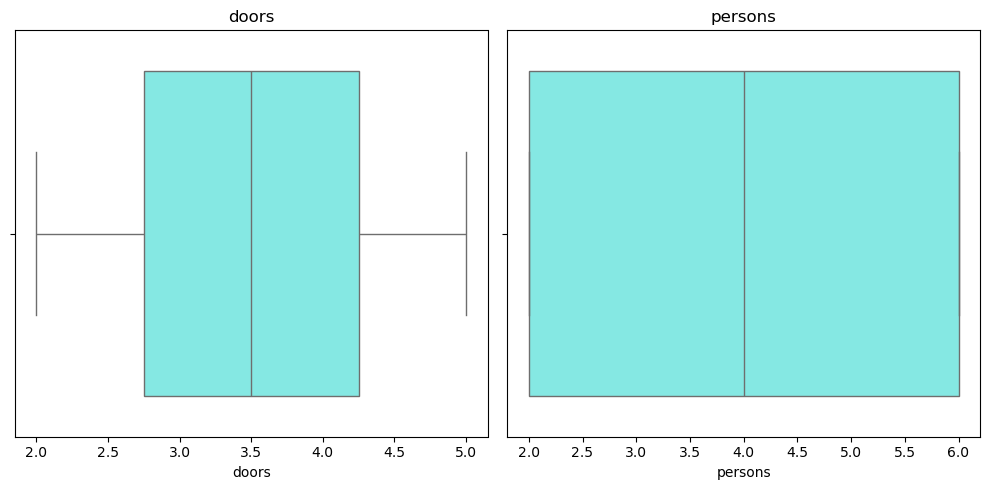

In [49]:
num_features = df.select_dtypes(include=['int64', 'float64'])
utils.plot_grafico_outliers(num_features,1,2,df)

##### No se encuentran valores outliers y ya tampoco se ven datos muy dispersos porque estos datos serian como categoricos.

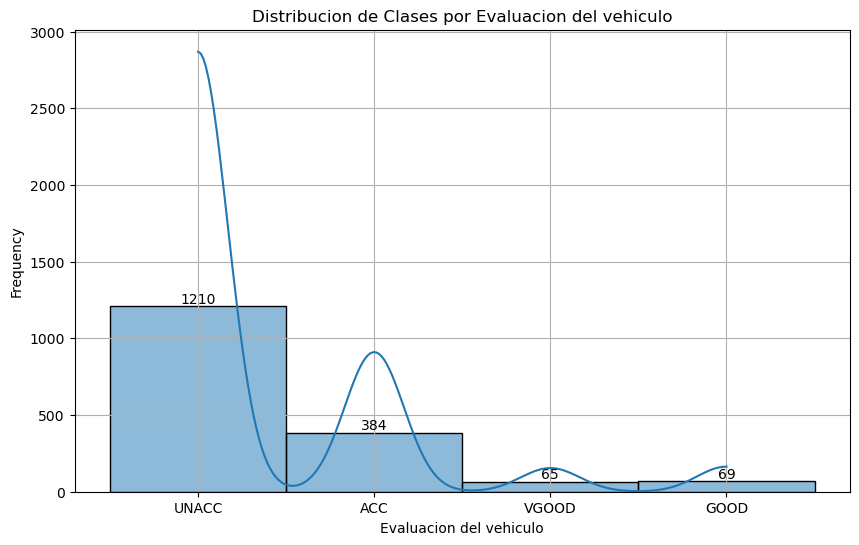

In [50]:
## Exploracion de datos
# Distribucion de la clase
plt.figure(figsize=(10, 6))
# Crear el histograma y almacenar la salida en una variable
hist = sns.histplot(df['class'], kde=True)
# Agregar los valores encima de las barras
for patch in hist.patches:  # Iterar sobre las barras
    x = patch.get_x() + patch.get_width() / 2  # Centro de la barra
    y = patch.get_height()  # Altura de la barra
    if y > 0:  # Mostrar solo si la frecuencia no es cero
        plt.text(x, y, int(y), ha='center', va='bottom', fontsize=10)
plt.title('Distribucion de Clases por Evaluacion del vehiculo')
plt.xlabel('Evaluacion del vehiculo')
plt.ylabel('Frequency')
plt.grid()
plt.show()

##### Se puede observar de que para nuestra clase targuet tipo de evaluacion, UNACC unaceptable es la clase mayoritaria, seguido de Acc aceptable con 364 y las demas VGOOD/GOOD con 65 y 69. Por lo que podemos concluir que es un dataset desbalanceado y se debe manejar como tal para las predicciones

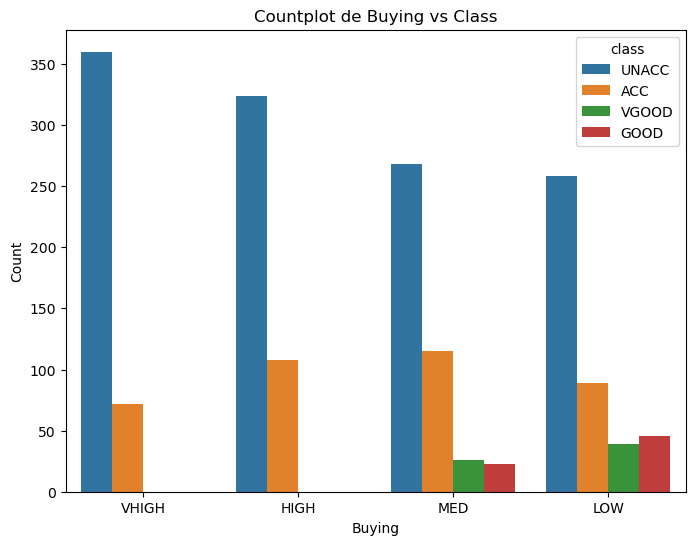

In [51]:
# Crear el countplot
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='buying', hue='class')

# Personalizar el gráfico
plt.xlabel('Buying')
plt.ylabel('Count')
plt.title('Countplot de Buying vs Class')
plt.show()

Parte 1: Preprocesamiento de Datos

- Limpieza de Datos:
    * Tratar los valores nulos utilizando técnicas adecuadas (imputación, eliminación, etc.).
    * Manejar los outliers mediante técnicas de filtrado o transformación.
- Transformación de Columnas:
    * Utilizar ColumnTransformer para aplicar transformaciones específicas a diferentes columnas.
    * Realizar codificación de variables categóricas utilizando técnicas como One-Hot Encoding.
    * Escalar las variables numéricas usando StandardScaler u otros métodos de normalización.
- Creación de Pipelines:
    * Crear pipelines utilizando Pipeline de sklearn para automatizar el preprocesamiento de datos y asegurar la reproducibilidad.
    * Incluir todos los pasos de preprocesamiento en el pipeline.


In [52]:
# Definir X e y. Dividir los datos en conjunto de entrenamiento y prueba

X = df.drop(['class'], axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [53]:
### No existen valores nulos que deban tratarse pero si valores outliers que seran escalados con RobustScaler ya que se encuentran valores outliers en BMI y charges
###Pipeline para preprocesamiento de valores
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()  # Get column names
categorical_features = X.select_dtypes(include=['object']).columns.tolist() # Get column names
# Crear transformadores para cada subconjunto de columnas
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Crear transformer para columnas categóricas con imputación
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Codificar categorías
])

# Combinar transformaciones
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Integrar en un pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Crear y aplicar el pipeline a los datos de entrenamiento
X_train_transformed = pipeline.fit_transform(X_train)

# Aplicar la misma transformación a los datos de prueba (sin hacer fit)
X_test_transformed = pipeline.transform(X_test)

print("Preprocesamiento completado. Datos transformados listos para modelar.")

Preprocesamiento completado. Datos transformados listos para modelar.


Parte 2: Selección de Técnica de Machine Learning

- Entrenamiento Inicial:
    * Entrenar múltiples modelos de machine learning (por ejemplo, Regresión Lineal, KNN, Árbol de Decisión, Random Forest, XGBoost, LGBM).
    * Evaluar los modelos utilizando validación cruzada y seleccionar el modelo con el mejor rendimiento inicial.
- Comparación de Modelos:
    * Comparar los modelos utilizando métricas de rendimiento relevantes (exactitud, precisión, recall, F1-Score, ROC-AUC, etc.).
    * Seleccionar la técnica de machine learning más adecuada basándose en las métricas y la naturaleza del problema.




In [54]:
# Definir los modelos
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# Evaluación con validación cruzada
cv_results = {}
for model_name, model in models.items():
    # Validación cruzada con scoring de 'accuracy'
    scores = cross_val_score(model, X_train_transformed , y_train, cv=5, scoring='accuracy')
    cv_results[model_name] = scores
    print(f"{model_name}: Mean Accuracy = {scores.mean():.4f}, Std = {scores.std():.4f}")

# Comparar los resultados
import pandas as pd
cv_summary = pd.DataFrame(cv_results).T
cv_summary.columns = [f'Fold {i+1}' for i in range(cv_summary.shape[1])]
cv_summary['Mean Accuracy'] = cv_summary.mean(axis=1)
cv_summary['Std Dev'] = cv_summary.std(axis=1)
print("\nResumen de Validación Cruzada:")
print(cv_summary)


Logistic Regression: Mean Accuracy = 0.8408, Std = 0.0184
K-Nearest Neighbors: Mean Accuracy = 0.9154, Std = 0.0145
Decision Tree: Mean Accuracy = 0.9740, Std = 0.0132

Resumen de Validación Cruzada:
                       Fold 1    Fold 2    Fold 3    Fold 4    Fold 5  \
Logistic Regression  0.862816  0.812274  0.833333  0.858696  0.836957   
K-Nearest Neighbors  0.924188  0.891697  0.916667  0.934783  0.909420   
Decision Tree        0.978339  0.956679  0.971014  0.996377  0.967391   

                     Mean Accuracy   Std Dev  
Logistic Regression       0.840815  0.018380  
K-Nearest Neighbors       0.915351  0.014506  
Decision Tree             0.973960  0.013207  


Parte 3: Optimización de Hiperparámetros

- GridSearchCV:
    * Implementar GridSearchCV para realizar una búsqueda exhaustiva de los mejores hiperparámetros para el modelo seleccionado.
    * Definir el espacio de búsqueda para los hiperparámetros relevantes.
- RandomizedSearchCV:
    * Implementar RandomizedSearchCV para realizar una búsqueda aleatoria de los mejores hiperparámetros, especialmente útil si el espacio de búsqueda es grande.
- Optuna:
    * Implementar Optuna para una optimización avanzada de los hiperparámetros, aprovechando técnicas como la optimización bayesiana y el pruning.
    Evaluación de Modelos Optimizados:
    * Entrenar el modelo con los mejores hiperparámetros encontrados y evaluar su rendimiento en el conjunto de prueba.
    * Comparar el rendimiento del modelo optimizado con el modelo inicial.


In [55]:
##Gridsearch
# Espacio de búsqueda para cada modelo
param_grid_lr = {
    'C': [0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [100, 200, 500]
}

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

param_grid_dt = {
    'max_depth': [1, 3, 5, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}


In [56]:
# Crear los modelos base
models = {
    'LogisticRegression': (LogisticRegression(random_state=42), param_grid_lr),
    'KNN': (KNeighborsClassifier(), param_grid_knn),
    'DecisionTree': (DecisionTreeClassifier(random_state=42), param_grid_dt)
}

# Realizar GridSearchCV para cada modelo
grid_results = {}
for name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_transformed, y_train)
    grid_results[name] = {
        'Best Params': grid_search.best_params_,
        'Best Score': grid_search.best_score_
    }

# Mostrar los resultados de GridSearchCV
import pandas as pd
grid_summary = pd.DataFrame(grid_results).T
print("Resultados de GridSearchCV:")
print(grid_summary)


c:\Users\ENRIF\anaconda3\envs\bootcamp_coding_dojo\Lib\site-packages\sklearn\model_selection\_search.py:1103: UserWarning: One or more of the test scores are non-finite: [0.91462879 0.92041804 0.91533511 0.92112698 0.9153325  0.92257102
 0.92256841 0.92907184        nan 0.93633391        nan 0.93705855
        nan 0.93921153        nan 0.94645529]
  warnings.warn(


Resultados de GridSearchCV:
                                                          Best Params  \
LogisticRegression     {'C': 100, 'max_iter': 100, 'solver': 'lbfgs'}   
KNN                 {'metric': 'manhattan', 'n_neighbors': 9, 'wei...   
DecisionTree        {'criterion': 'entropy', 'max_depth': None, 'm...   

                   Best Score  
LogisticRegression   0.857453  
KNN                  0.946455  
DecisionTree         0.977562  


In [57]:
###RandomizerSearch
# Espacio de búsqueda para RandomizedSearchCV
random_grid_lr = {
    'C': randint(1, 100),
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': randint(100, 500)
}

random_grid_knn = {
    'n_neighbors': randint(3, 10),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

random_grid_dt = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': randint(2, 15),
    'min_samples_leaf': randint(1, 10),
    'criterion': ['gini', 'entropy']
}

# Asociar los modelos con sus espacios de parámetros para RandomizedSearchCV
random_models = {
    'LogisticRegression': (LogisticRegression(random_state=42), random_grid_lr),
    'KNN': (KNeighborsClassifier(), random_grid_knn),
    'DecisionTree': (DecisionTreeClassifier(random_state=42), random_grid_dt)
}

# Realizar RandomizedSearchCV para cada modelo
random_results = {}
for name, (model, random_grid) in random_models.items():
    random_search = RandomizedSearchCV(estimator=model, param_distributions=random_grid, n_iter=50, 
                                    cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
    random_search.fit(X_train_transformed, y_train)
    random_results[name] = random_search

# Crear DataFrame con los mejores resultados
results_data = {
    name: {
        'Best Params': random_search.best_params_,
        'Best Score': random_search.best_score_
    }
    for name, random_search in random_results.items()
}

results_df = pd.DataFrame(results_data).T
print(results_df)


c:\Users\ENRIF\anaconda3\envs\bootcamp_coding_dojo\Lib\site-packages\sklearn\model_selection\_search.py:1103: UserWarning: One or more of the test scores are non-finite: [0.90954063 0.92112698 0.9153325         nan 0.92112698 0.92691624
 0.93705855 0.9247554  0.95079527        nan 0.92691624 0.93921153
 0.91462879 0.92907184 0.94355674 0.94645529 0.94645529 0.90954063
        nan 0.91533511 0.91462879        nan 0.95079527 0.93633391
 0.9247554  0.94645529 0.90954063        nan 0.93633391 0.94355674
 0.95079527 0.94355674 0.92907184 0.94355674 0.95079527 0.94645529
 0.90954063 0.93633391 0.93921153 0.89435724 0.89435724 0.94355674
 0.91462879 0.9153325  0.92256841 0.93633391        nan 0.92041804
 0.91533511 0.92257102]
  warnings.warn(


                                                          Best Params  \
LogisticRegression      {'C': 72, 'max_iter': 288, 'solver': 'lbfgs'}   
KNN                 {'metric': 'manhattan', 'n_neighbors': 8, 'wei...   
DecisionTree        {'criterion': 'gini', 'max_depth': 10, 'min_sa...   

                   Best Score  
LogisticRegression   0.857453  
KNN                  0.950795  
DecisionTree         0.971069  


In [58]:
###Comparar resultados
comparison = pd.concat([grid_summary['Best Score'], results_df['Best Score']], axis=1)
comparison.columns = ['GridSearchCV', 'RandomizedSearchCV']
print("Comparación de GridSearchCV y RandomizedSearchCV:")
print(comparison)

Comparación de GridSearchCV y RandomizedSearchCV:
                   GridSearchCV RandomizedSearchCV
LogisticRegression     0.857453           0.857453
KNN                    0.946455           0.950795
DecisionTree           0.977562           0.971069


##### DecisionTree se ve como la mejor opcion para este problema de clasificacion

In [59]:
# Obtener los mejores modelos de RandomizedSearchCV
optimized_lr = random_results['LogisticRegression'].best_estimator_
optimized_knn = random_results['KNN'].best_estimator_
optimized_dt = random_results['DecisionTree'].best_estimator_

# Supongamos que ya tenemos los mejores modelos optimizados
best_models = {
    'LogisticRegression': optimized_lr,  # modelo entrenado
    'KNN': optimized_knn,                # modelo entrenado
    'DecisionTree': optimized_dt         # modelo entrenado
}


# Evaluación y almacenamiento de métricas
evaluation_results = {}

for name, model in best_models.items():
    y_pred = model.predict(X_test_transformed)
    y_pred_proba = model.predict_proba(X_test_transformed) if hasattr(model, "predict_proba") else None

    # Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')  # 'macro' para multiclase
    recall = recall_score(y_test, y_pred, average='macro')        # 'macro' para multiclase
    f1 = f1_score(y_test, y_pred, average='macro')                # 'macro' para multiclase

    # Calcular ROC-AUC si aplica
    if y_pred_proba is not None:
        if y_pred_proba.ndim == 2:  # Salida bidimensional para multiclase
            roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')  # O 'ovo'
        else:
            roc_auc = "N/A"  # No se puede calcular ROC-AUC con una dimensión
    else:
        roc_auc = "N/A"

    # Almacenar resultados
    evaluation_results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    }

# Convertir resultados a DataFrame para análisis
import pandas as pd
evaluation_df = pd.DataFrame(evaluation_results).T
print("Evaluación de Modelos:")
print(evaluation_df)


Evaluación de Modelos:
                    Accuracy  Precision    Recall  F1-Score   ROC-AUC
LogisticRegression  0.835260   0.768771  0.759453  0.759307  0.960152
KNN                 0.947977   0.880963  0.892947  0.884681  0.992254
DecisionTree        0.968208   0.920560  0.954845  0.935429  0.994205


### Decision tree se ve como la mejor opcion de modelo para este caso